# Introduction

In this notebook, we will be building a neural network model to predict housing prices via the following sections: 

1. **Import Libraries**: We start by importing essential Python libraries for data manipulation, visualization, and machine learning.

2. **Load and Inspect Data**: We load the housing dataset and perform initial inspections to understand its structure and contents.

3. **Data Preprocessing**: This step involves cleaning and preparing the data, including converting dates into usable features, calculating house age, and removing irrelevant columns.

4. **Data Visualization**: We explore the dataset through various visualizations to understand the distributions, relationships, and correlations between features.

5. **Split Data into Training and Test Sets**: We prepare the data for model training by splitting it into training and test sets.

6. **Build and Train the Model**: We construct a neural network using TensorFlow/Keras and train it on our data to learn the patterns related to housing prices.

7. **Evaluate the Model**: We assess the performance of the model using various metrics and visualize training results, including predictions versus actual prices and residuals analysis.

8. **Feature Importance**: We determine the importance of different features in predicting housing prices using permutation importance.

9. **Example Prediction**: Finally, we make a prediction on a new set of feature values to see how the model performs on unseen data.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from numpy import int64
from tensorflow import keras
from tensorflow.keras import layers, models

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

Fetch and Load Data

In [54]:
# Load the dataset
df = pd.read_csv('data/kc_house_data.csv')
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


Exploratory Data Analysis (EDA) and Data Preparation

In [55]:
# print shape and size of df
df.shape

(21614, 21)

In [56]:
# print counts of all columns, check for null values, and print dtypes pf all columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21614 entries, 0 to 21613
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21614 non-null  int64  
 1   date           21614 non-null  object 
 2   price          21614 non-null  float64
 3   bedrooms       21614 non-null  int64  
 4   bathrooms      21614 non-null  float64
 5   sqft_living    21614 non-null  int64  
 6   sqft_lot       21614 non-null  int64  
 7   floors         21614 non-null  float64
 8   waterfront     21614 non-null  int64  
 9   view           21614 non-null  int64  
 10  condition      21614 non-null  int64  
 11  grade          21614 non-null  int64  
 12  sqft_above     21614 non-null  int64  
 13  sqft_basement  21614 non-null  int64  
 14  yr_built       21614 non-null  int64  
 15  yr_renovated   21614 non-null  int64  
 16  zipcode        21614 non-null  int64  
 17  lat            21614 non-null  float64
 18  long  

In [57]:
# print summary statistics about df
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161400e+04,2.161400e+04,21614.000000,21614.000000,21614.000000,2.161400e+04,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000,21614.000000
mean,4.580205e+09,5.400911e+05,3.370871,2.114798,2079.894189,1.510650e+04,1.494286,0.007541,0.234293,3.409503,7.656843,1788.356528,291.537661,1971.004858,84.398353,98077.942491,47.560051,-122.213905,1986.523503,12768.096234
std,2.876534e+09,3.671190e+05,0.930050,0.770169,918.420011,4.141961e+04,0.539987,0.086515,0.766301,0.650818,1.175440,828.087051,442.584799,29.372760,401.670358,53.505246,0.138561,0.140830,685.388698,27303.599094
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219625e+05,3.000000,1.750000,1427.750000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471025,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230500,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [58]:
# Preprocess the data
# Convert Registration date into age

# Step 1: Keep only year from registration data column
# Split date from start till index 3
df['reg_year'] = df['date'].str[:4] #save year into new column - 'reg_year'
print(df['reg_year']) 
df['reg_year'] =df['reg_year'].astype(int64) # Cast reg_year as integer 
print('-----------------------------------------------------------')
print(df['reg_year'].dtype)

# Step 2: Create a new column -- 'house_age'
df['house_age'] = np.NaN
# df.info()

# Step 3: Calculate and save house_age
# df.loc[row_indexer, "col"] == values to check for 'col' values

for i in df.index:
    if df.loc[i, 'yr_renovated'] == 0:      #renovated value is missing
        df.loc[i, 'house_age'] = df.loc[i, 'reg_year'] - df.loc[i, 'yr_built']
    else:                                   #renovated value is present
        df.loc[i, 'house_age'] = df.loc[i, 'reg_year'] - df.loc[i, 'yr_renovated']

# Step 4: Remove the other date columns
df.drop(['date', 'yr_built', 'yr_renovated', 'reg_year'], axis='columns', inplace=True)
print('-----------------------------------------------------------')
print(df.info())
print('-----------------------------------------------------------')
print(df.head(3))

0        2014
1        2014
2        2015
3        2014
4        2014
         ... 
21609    2014
21610    2015
21611    2014
21612    2015
21613    2014
Name: reg_year, Length: 21614, dtype: object
-----------------------------------------------------------
int64
-----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21614 entries, 0 to 21613
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21614 non-null  int64  
 1   price          21614 non-null  float64
 2   bedrooms       21614 non-null  int64  
 3   bathrooms      21614 non-null  float64
 4   sqft_living    21614 non-null  int64  
 5   sqft_lot       21614 non-null  int64  
 6   floors         21614 non-null  float64
 7   waterfront     21614 non-null  int64  
 8   view           21614 non-null  int64  
 9   condition      21614 non-null  int64  
 10  grade          21614 non-null  in

In [59]:
# Remove irrelevant columns (especially when columns contain numbers that might mislead the model )
df.drop(['id', 'lat', 'long', 'zipcode'], axis='columns', inplace=True)
print(df.info())
print('---------------------------------------------')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21614 entries, 0 to 21613
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21614 non-null  float64
 1   bedrooms       21614 non-null  int64  
 2   bathrooms      21614 non-null  float64
 3   sqft_living    21614 non-null  int64  
 4   sqft_lot       21614 non-null  int64  
 5   floors         21614 non-null  float64
 6   waterfront     21614 non-null  int64  
 7   view           21614 non-null  int64  
 8   condition      21614 non-null  int64  
 9   grade          21614 non-null  int64  
 10  sqft_above     21614 non-null  int64  
 11  sqft_basement  21614 non-null  int64  
 12  sqft_living15  21614 non-null  int64  
 13  sqft_lot15     21614 non-null  int64  
 14  house_age      21614 non-null  float64
dtypes: float64(4), int64(11)
memory usage: 2.5 MB
None
---------------------------------------------
              price      bedrooms     bat

In [60]:
# remove columns with invalid house_age (house_age is -1) 
df = df[df['house_age']!=-1]
print(df.describe())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159600e+04  21596.000000  21596.000000  21596.000000  2.159600e+04   
mean   5.401054e+05      3.370717      2.114408   2079.523199  1.511292e+04   
std    3.672379e+05      0.929764      0.770040    918.111315  4.143550e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.215000e+05      3.000000      1.750000   1429.250000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.620000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.069525e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21596.000000  21596.000000  21596.000000  21596.000000  21596.000000   
mean       1.493865      0.007548      0.233886      3.409844      7.656233   
std        0.539693      0.086551      0.765415    

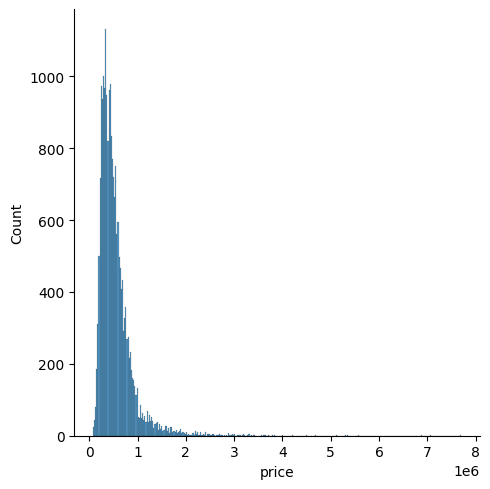

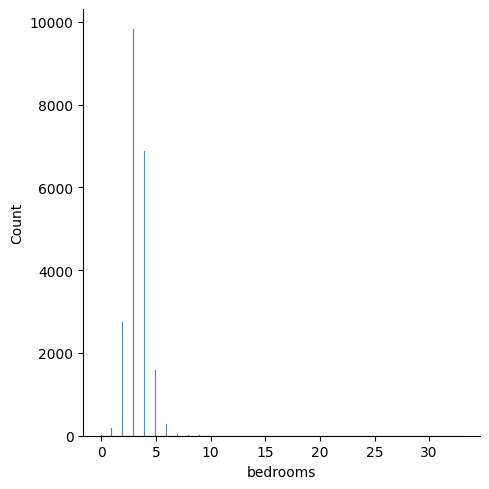

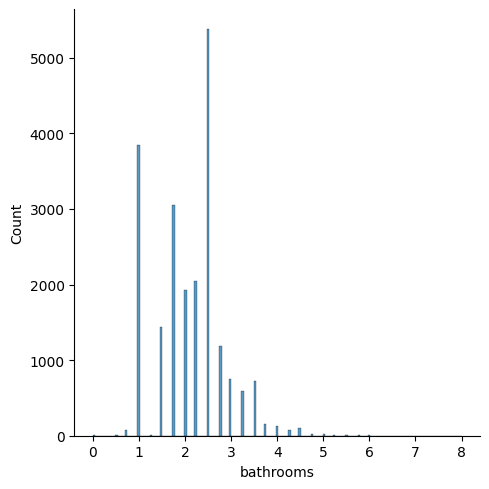

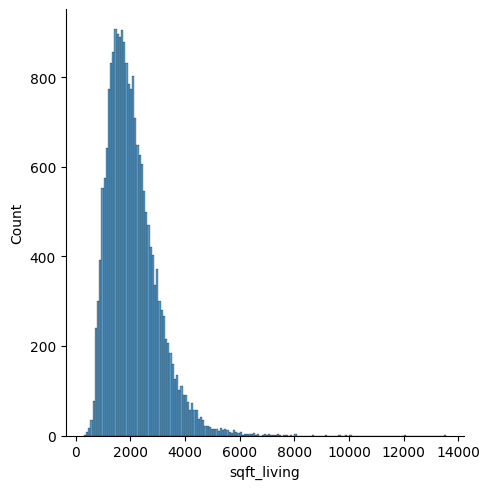

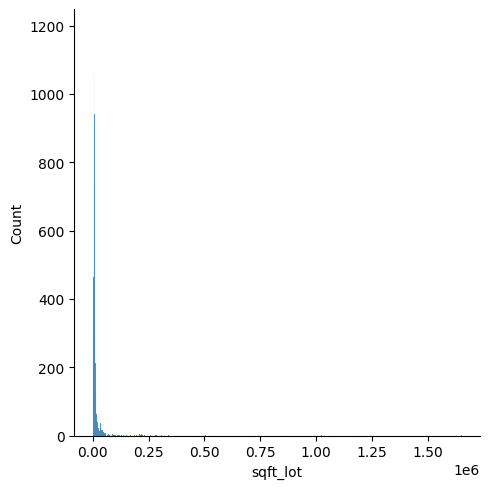

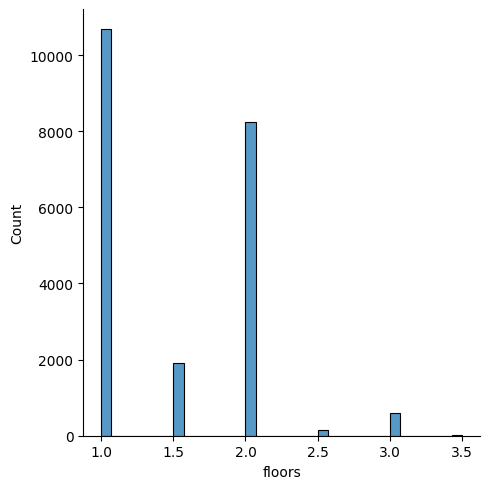

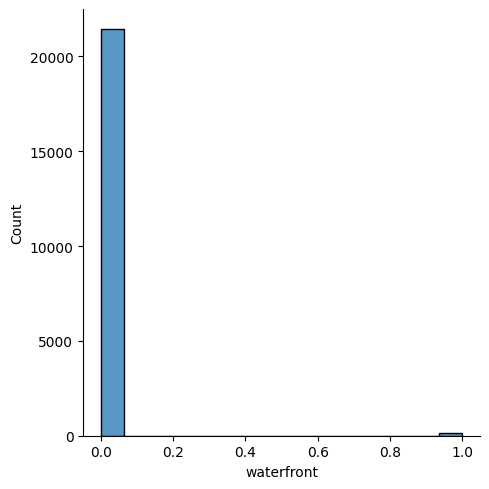

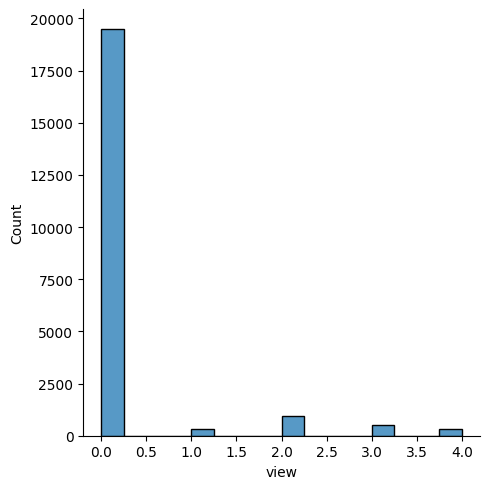

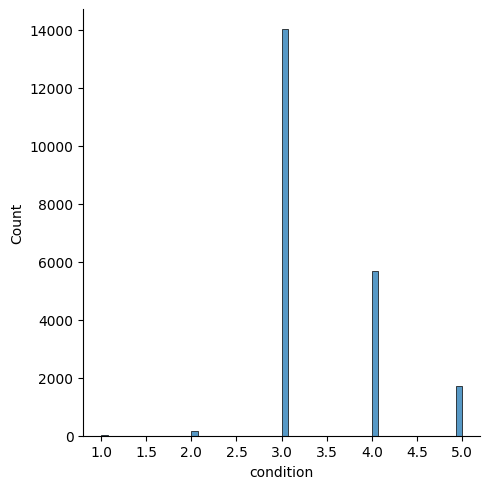

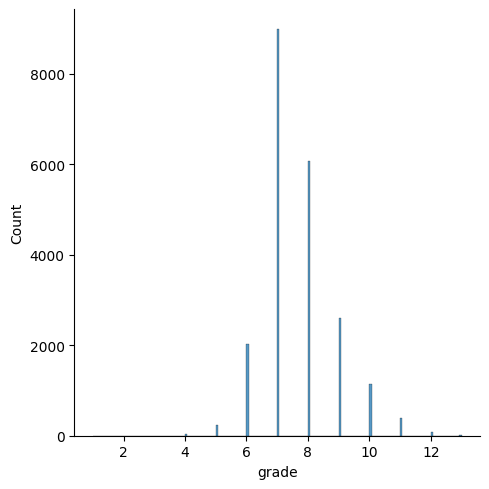

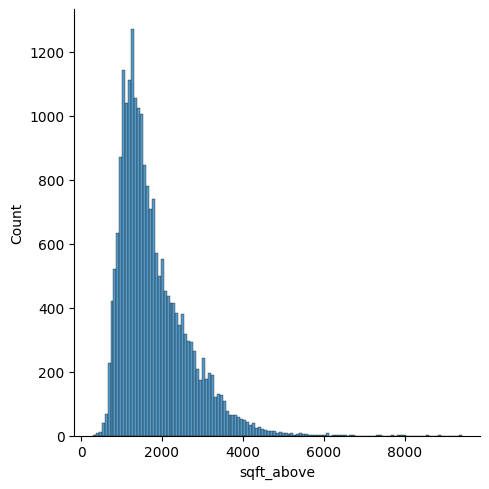

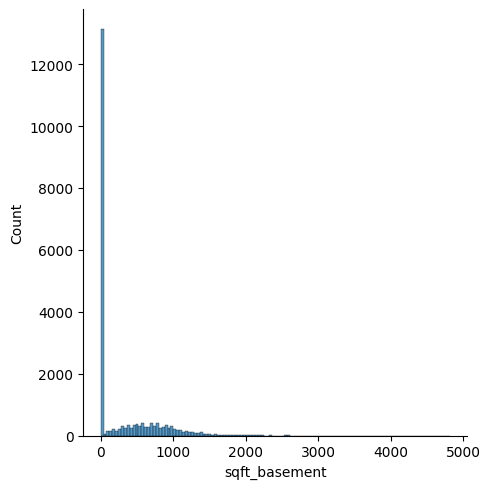

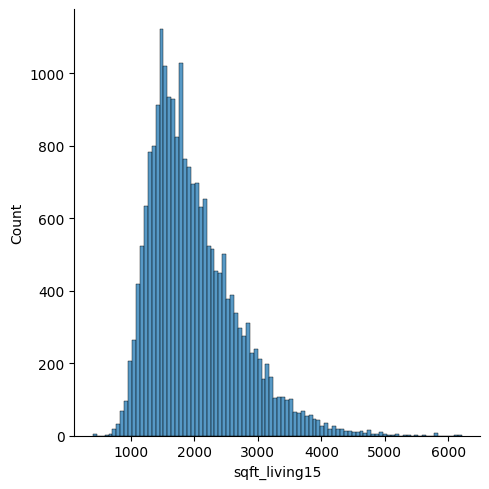

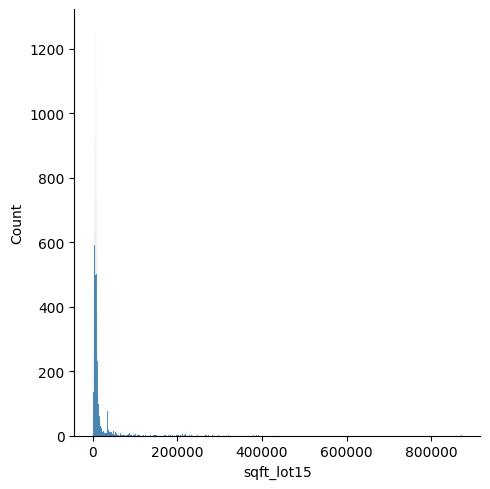

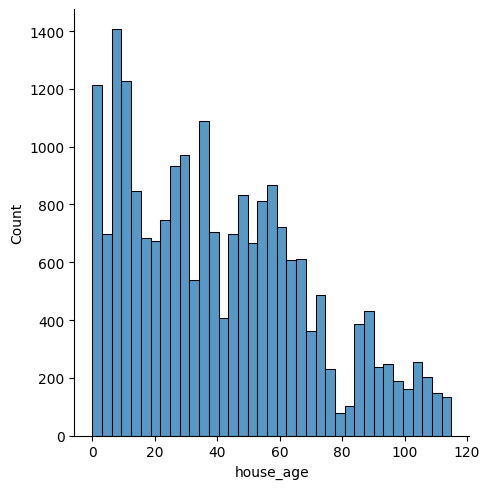

In [61]:
for i in df.columns:
    sns.displot(df[i])
    plt.show()

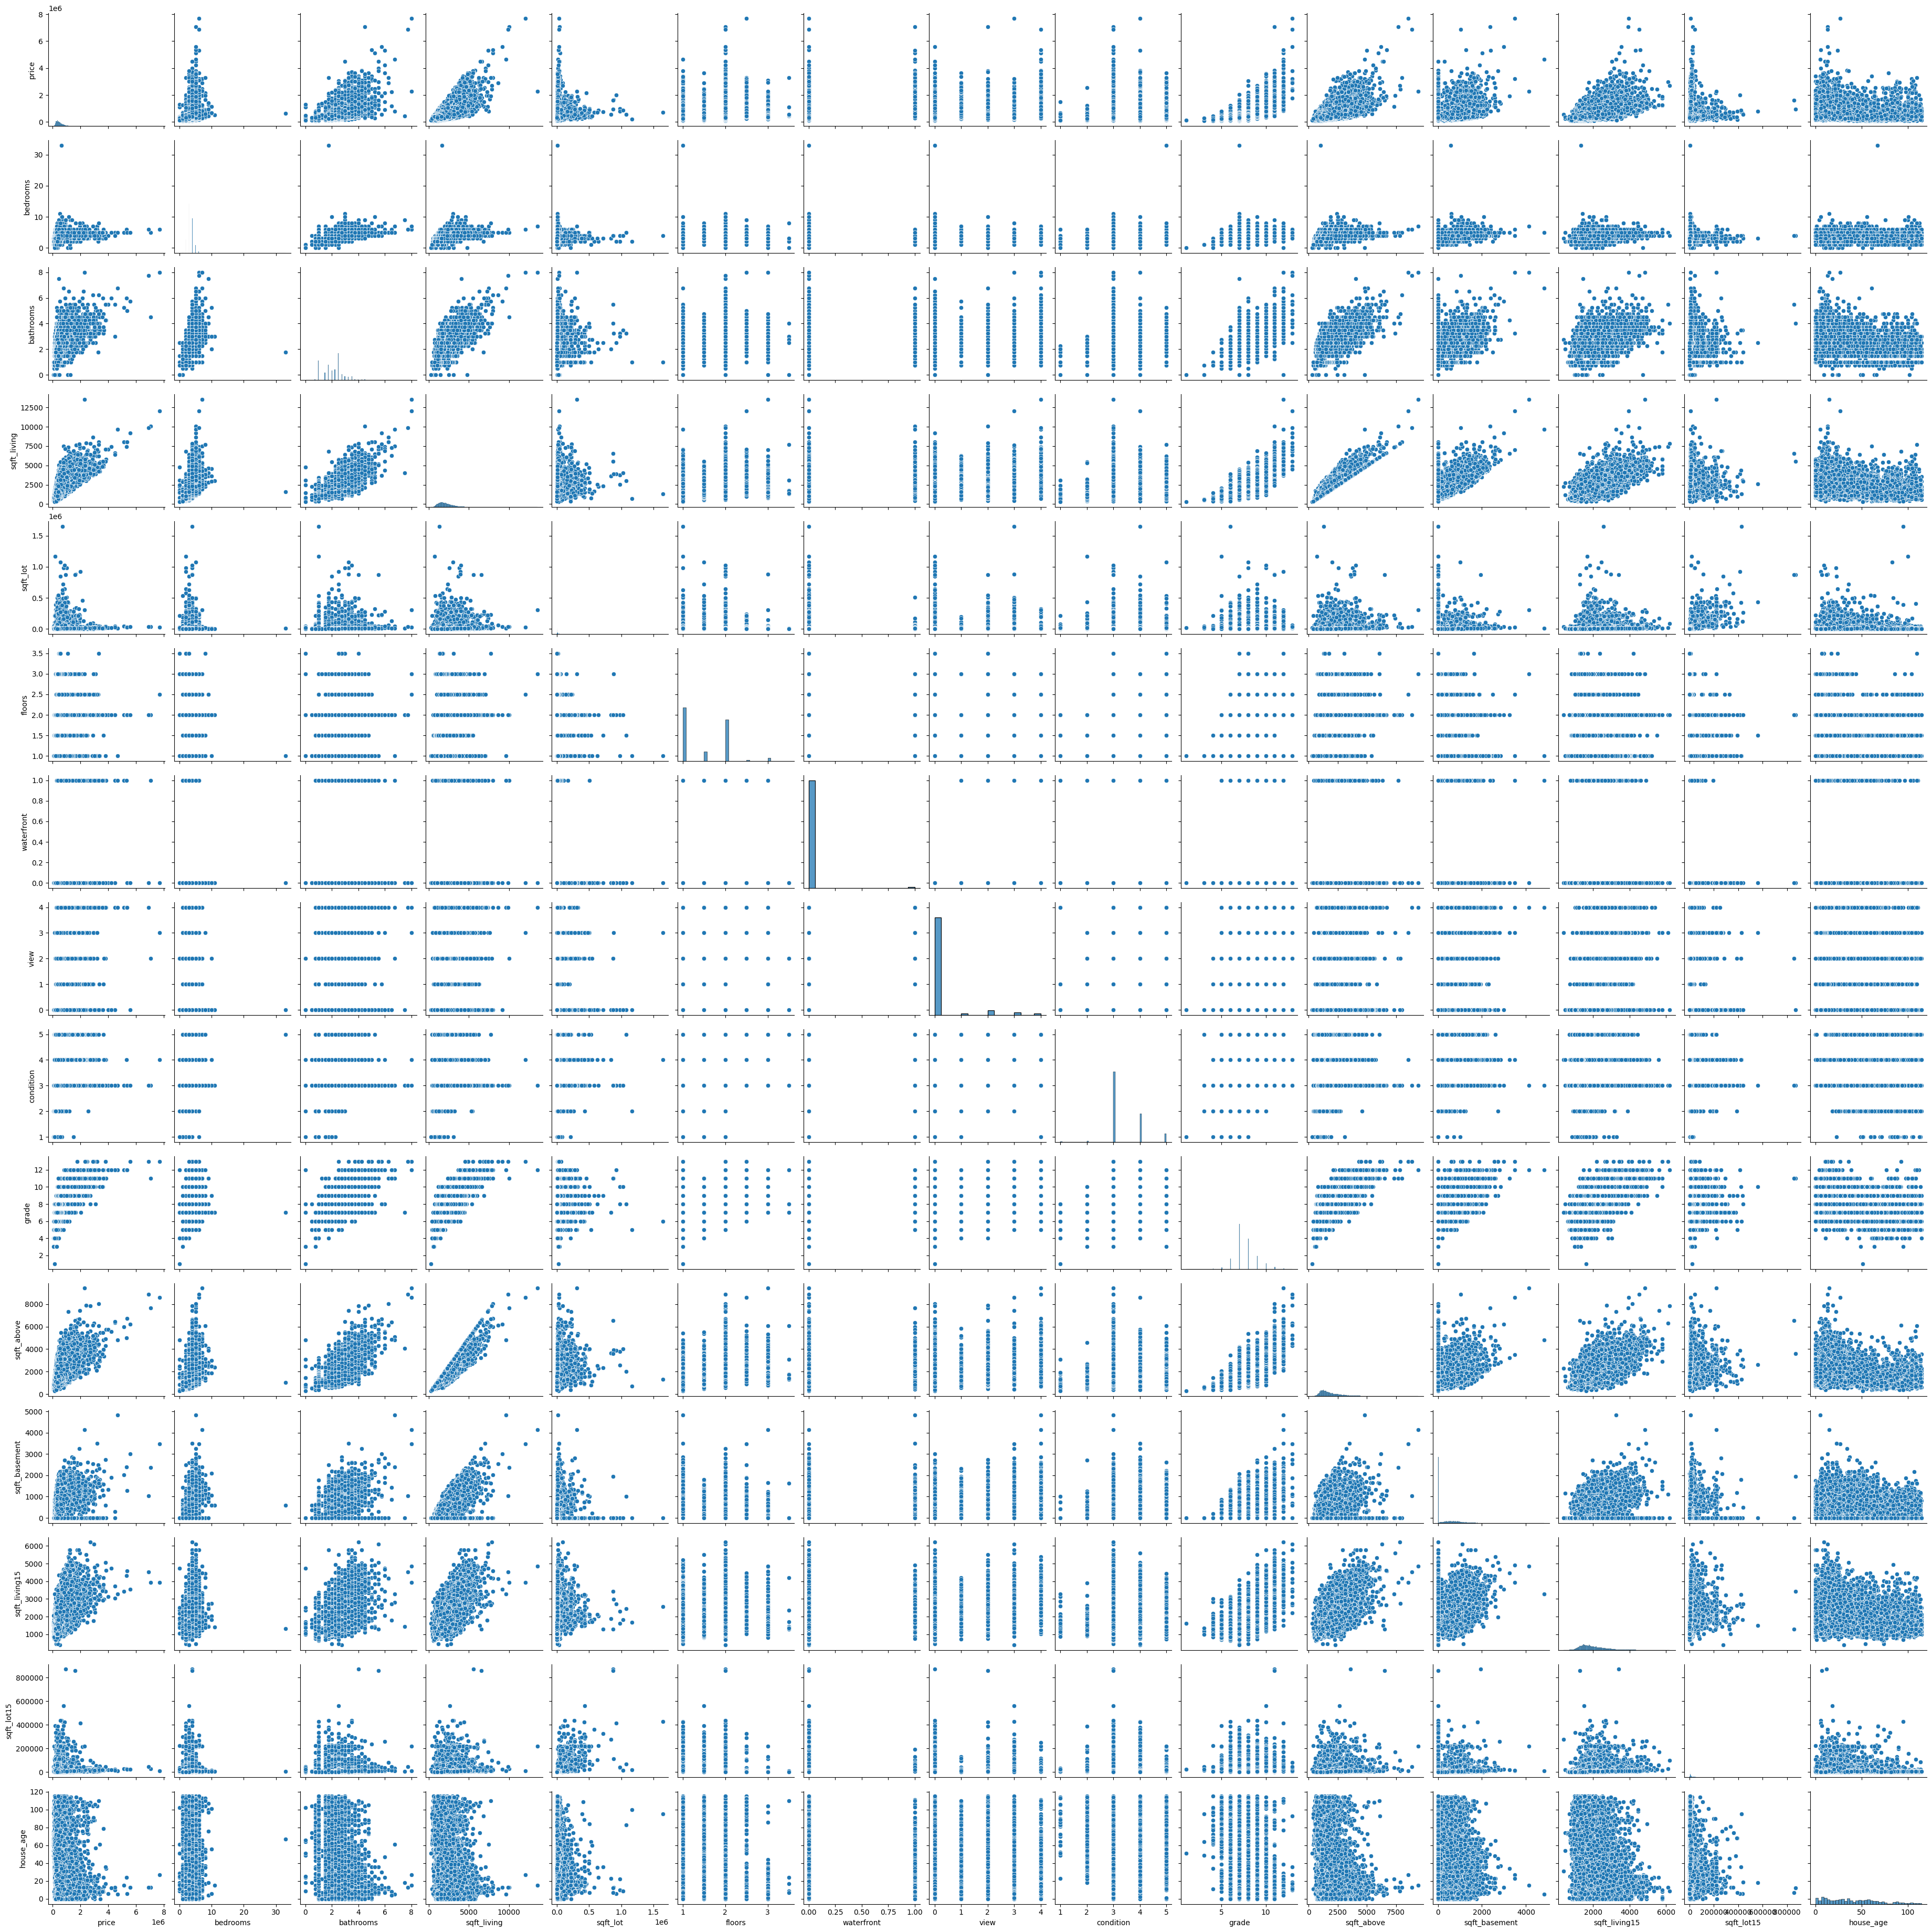

In [62]:
# pairplot
sns.pairplot(df)
plt.show()

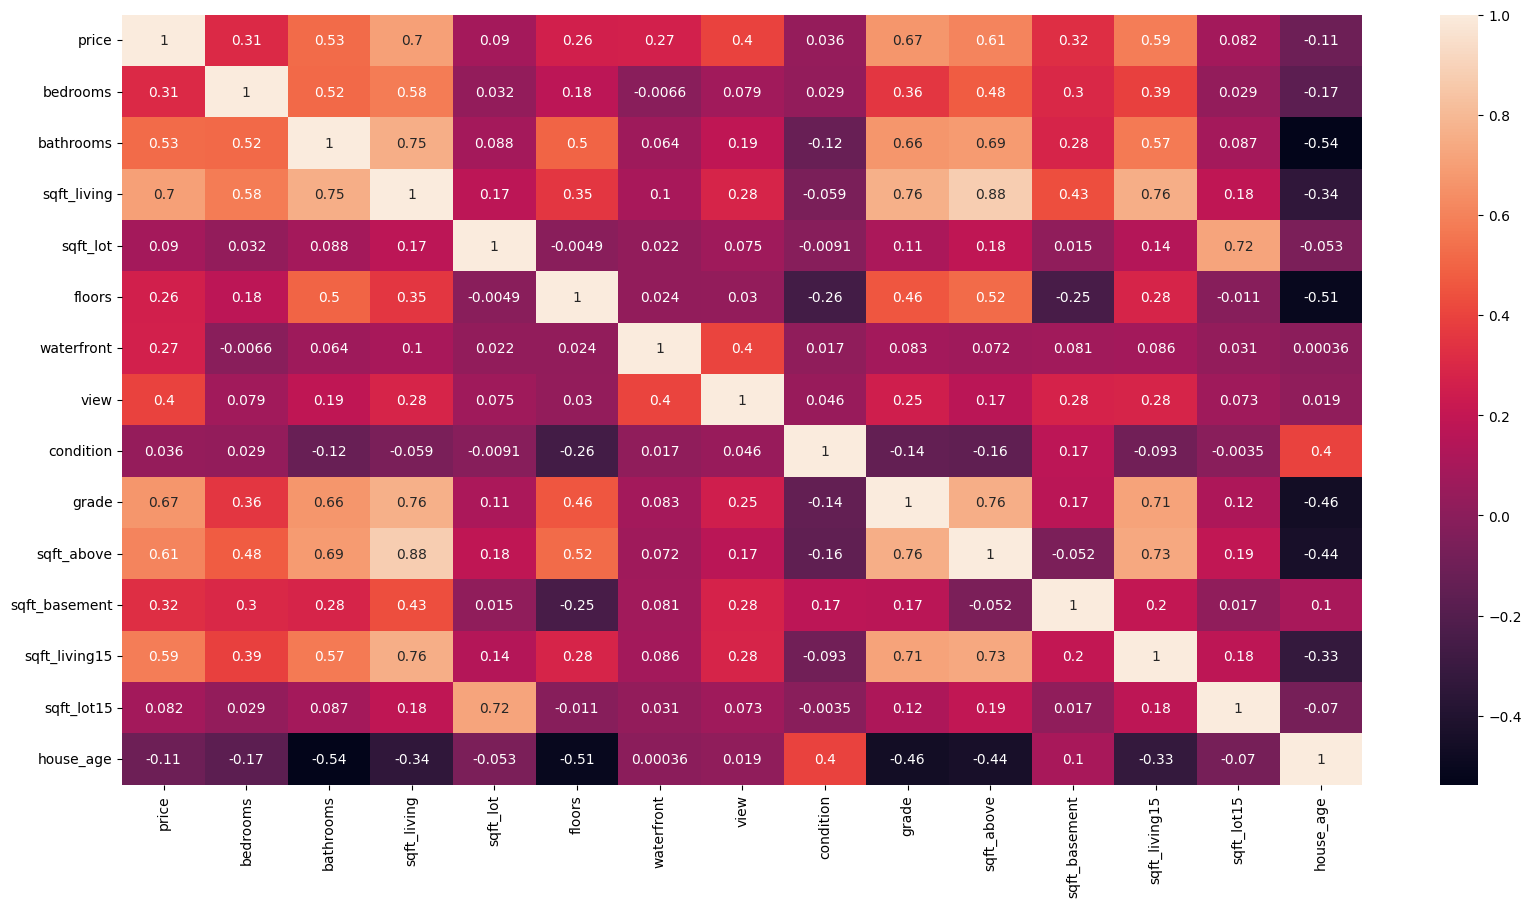

In [63]:
# Plot Heatmap
# Mulit-Colinearity of House Attributes
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

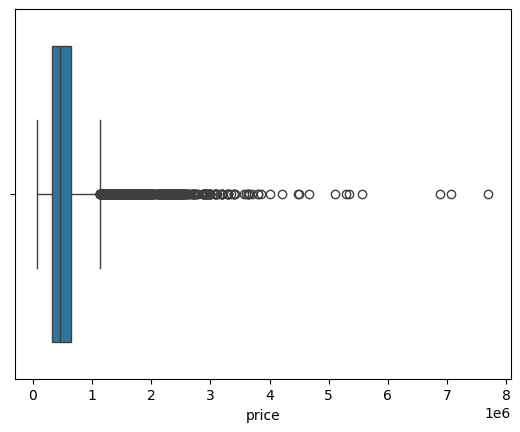

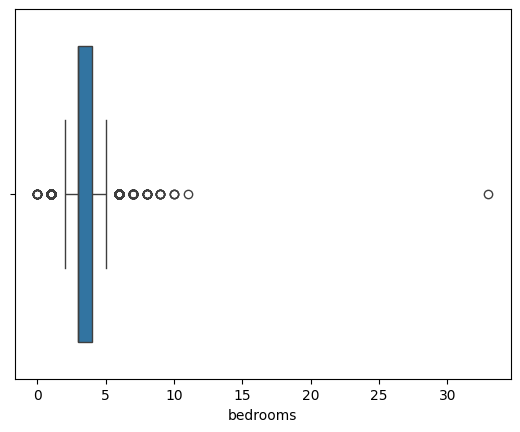

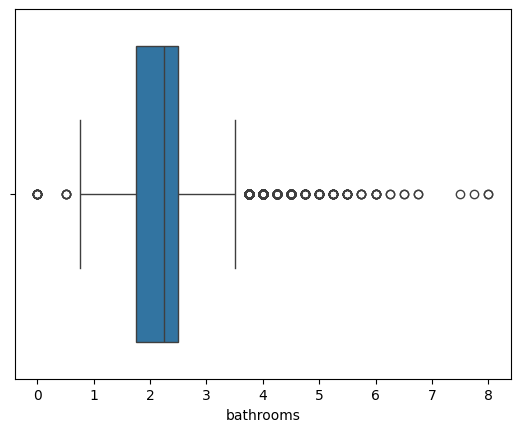

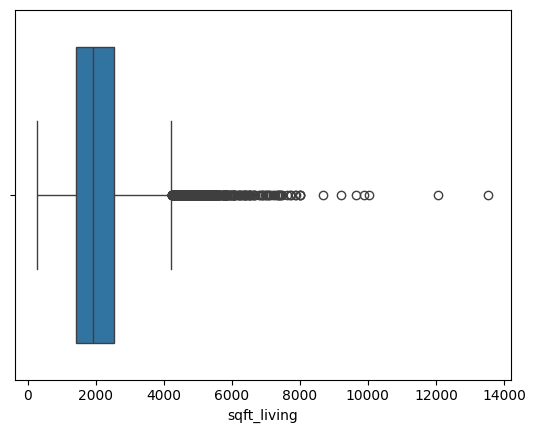

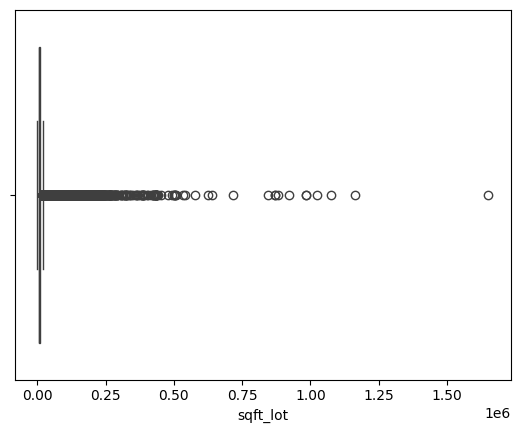

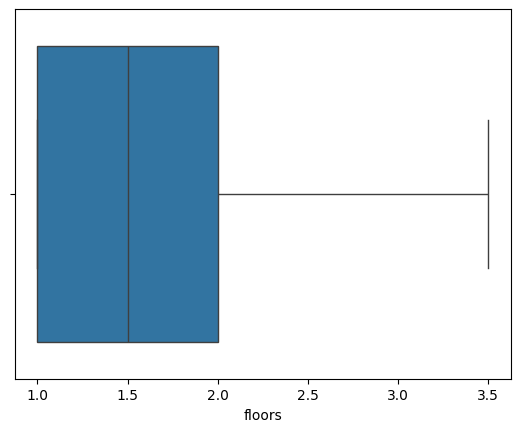

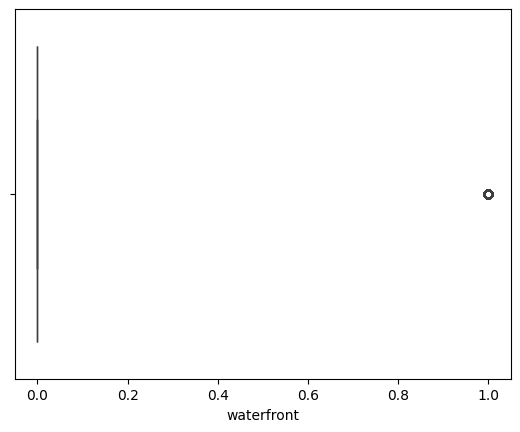

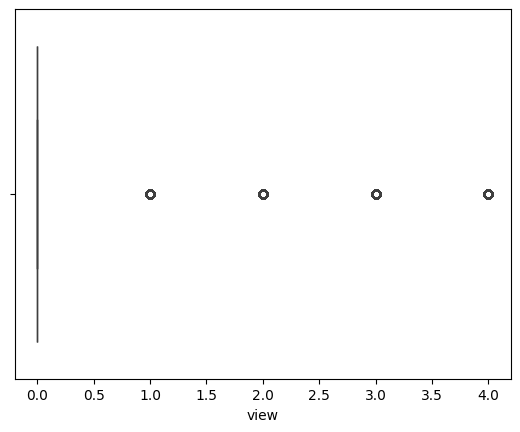

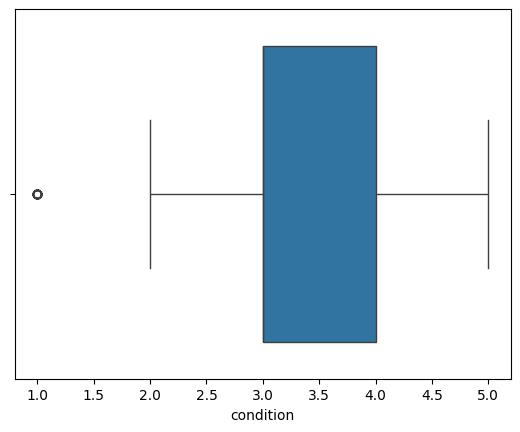

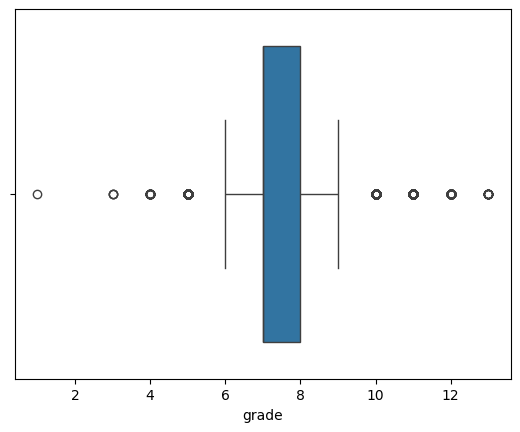

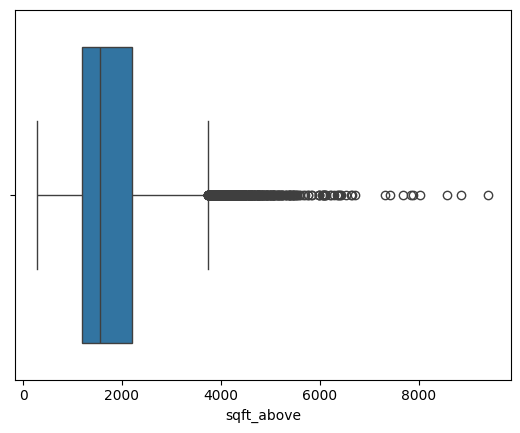

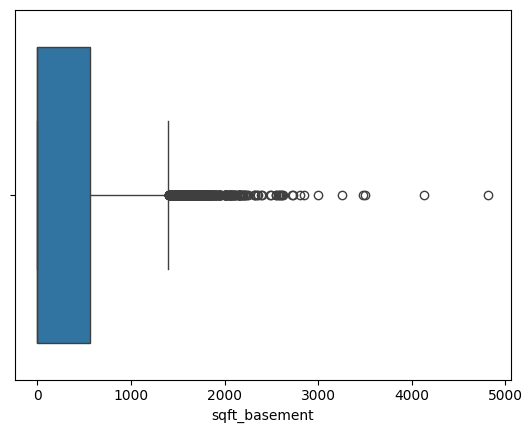

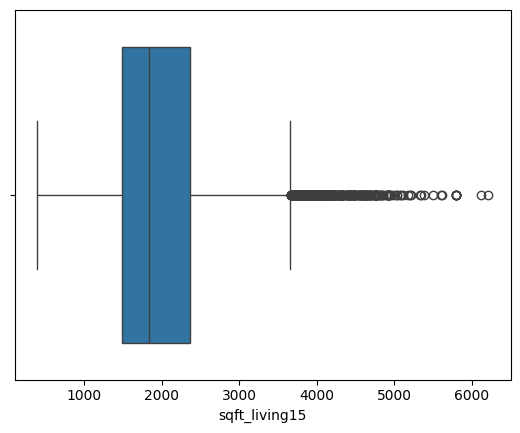

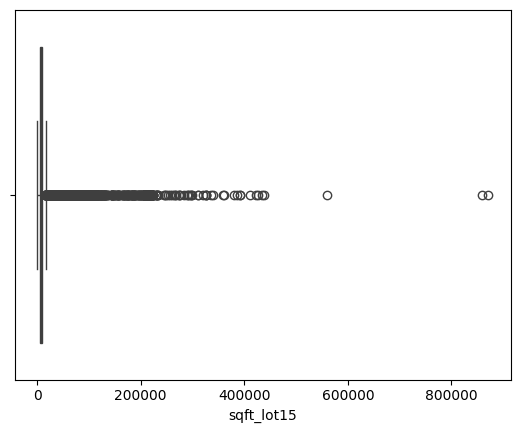

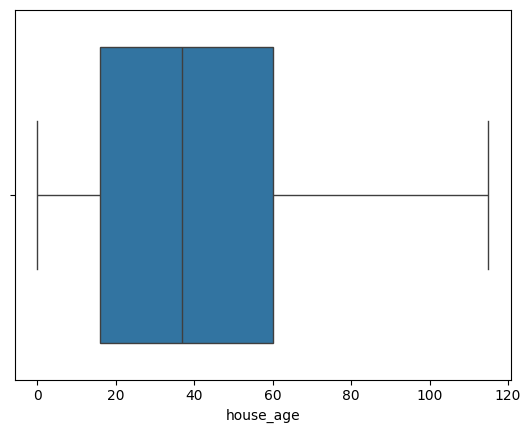

In [64]:
# Box plot for all columns
# Outliers
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.show()

Define Keras Model 

In [65]:
# Split dataset into input and output
# df.columns
X = df.drop(['price'], axis=1) #input
y = df.price #output

#Check Shapes
print(X.shape)
print(y.shape)
print('-------------------------------------------------------')
#Check input and output dataframes
print(X.head(3))
print('-------------------------------------------------------')
print(y.head(3))

(21596, 14)
(21596,)
-------------------------------------------------------
   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   

   condition  grade  sqft_above  sqft_basement  sqft_living15  sqft_lot15  \
0          3      7        1180              0           1340        5650   
1          3      7        2170            400           1690        7639   
2          3      6         770              0           2720        8062   

   house_age  
0       59.0  
1       23.0  
2       82.0  
-------------------------------------------------------
0    221900.0
1    538000.0
2    180000.0
Name: price, dtype: float64


In [66]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [67]:
# print shape of training data
print(X_train.shape)
print(X_train.shape[1])

(14469, 14)
14


In [68]:
# Using RELU-rectified linear activation function
model = keras.Sequential()
model.add(layers.Dense(14, activation='relu', input_shape=(X_train.shape[1],))) # Input layer
model.add(layers.Dense(4, activation='relu'))  #hidden layer. 4 neurons 
model.add(layers.Dense(3, activation='relu'))  #hidden layer. 3 neurons 
model.add(layers.Dense(2, activation='relu'))  #hidden layer. 2 neurons 
model.add(layers.Dense(1))  #output layer. single output --price

d:\Users\Sean\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile and Train (Fit) Keras Model

In [69]:
# Compile model with MSE as loss function and SGD as Optimizer
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

# Train (fit) the model
history = model.fit(X_train, y_train, validation_split=0.33, batch_size=32, epochs=100)

Epoch 1/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 404229423104.0000 - mae: 529197.8125 - mse: 404229423104.0000 - val_loss: 363149000704.0000 - val_mae: 475810.6562 - val_mse: 363149000704.0000
Epoch 2/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 351459934208.0000 - mae: 449740.2500 - mse: 351459934208.0000 - val_loss: 325135925248.0000 - val_mae: 418436.0938 - val_mse: 325135925248.0000
Epoch 3/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 311988846592.0000 - mae: 408997.9688 - mse: 311988846592.0000 - val_loss: 291324493824.0000 - val_mae: 379854.2500 - val_mse: 291324493824.0000
Epoch 4/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 269879640064.0000 - mae: 369096.2812 - mse: 269879640064.0000 - val_loss: 210572984320.0000 - val_mae: 307646.1250 - val_mse: 210572984320.0000
Epoch 5/100
303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 175302524928.0000 - mae: 274637.5312 - mse: 175302524928.0000 - val_loss: 97766178816.0000 - val_mae: 191152.4062 - val

In [70]:
model.summary()

#Parameter Calculation
#Parameters=(input_features×neurons)+neurons_bias
#input layer:       params = (14*14) +14 = 210,     Output Shape: (None, 14)
#hidden layer 1:    params = (14*4) + 4 =60,        Output Shape: (None, 4)
#hidden layer 2:    params = (4*3) + 3 =15,         Output Shape: (None, 3)
#hidden layer 3:    params = (3*2) + 2 =8,          Output Shape: (None, 2)
#output layer:      params = (2*1) + 1 =3,          Output Shape: (None, 1)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 14)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 890 (3.48 KB)

 Trainable params: 296 (1.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 594 (2.32 KB)

Evaluate the Model

In [71]:
# Predict on test dataset
y_pred = model.predict(X_test).flatten()  # Flatten predictions to 1D

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-Squared: {r2}')

223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Absolute Error: 165658.87812631542
Mean Squared Error: 64558349280.00169
Root Mean Squared Error: 254083.3510484339
R-Squared: 0.5032499102612604


Visualize the Training

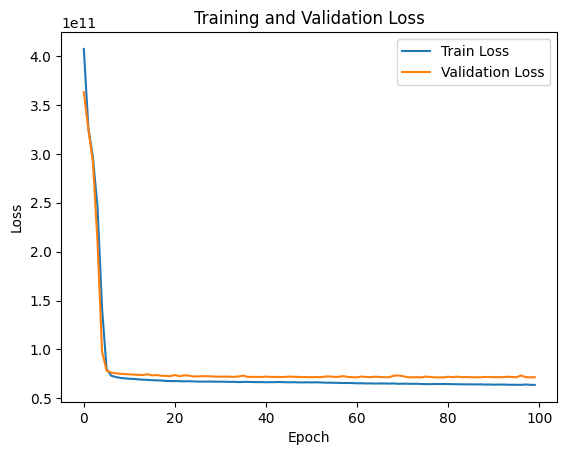

In [72]:
# Visualize the training
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

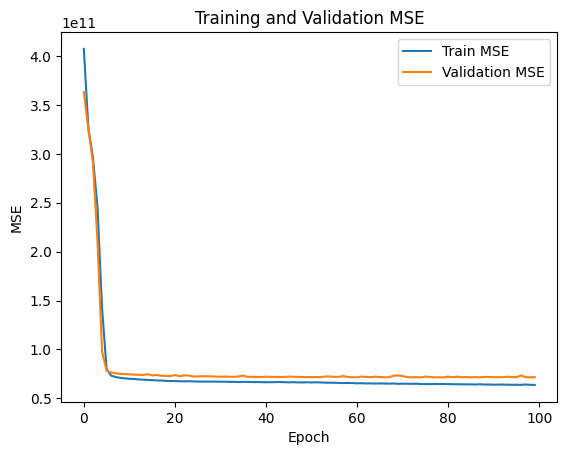

In [73]:
# Visualize the training
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Validation MSE')
plt.legend()
plt.show()

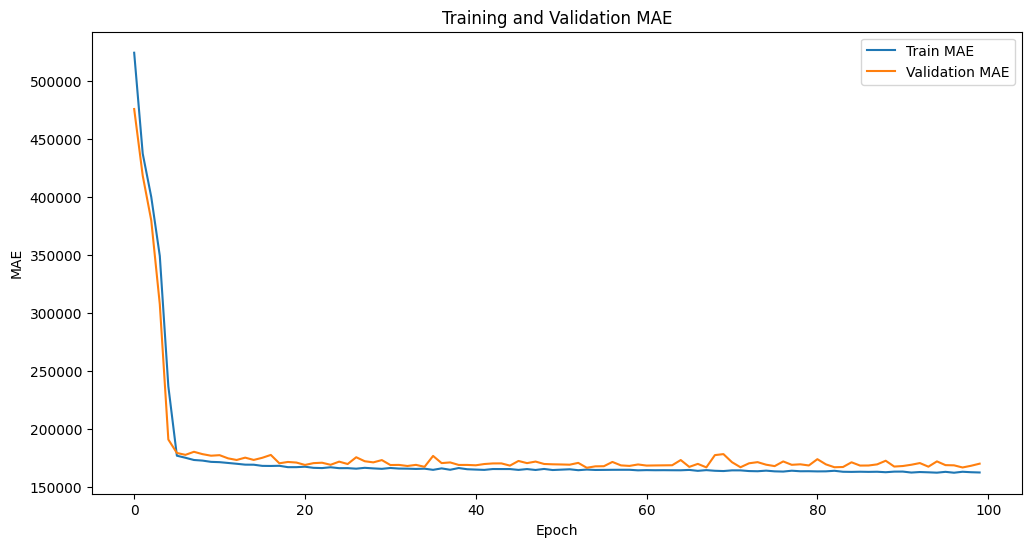

In [74]:
# Visualize the training
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()

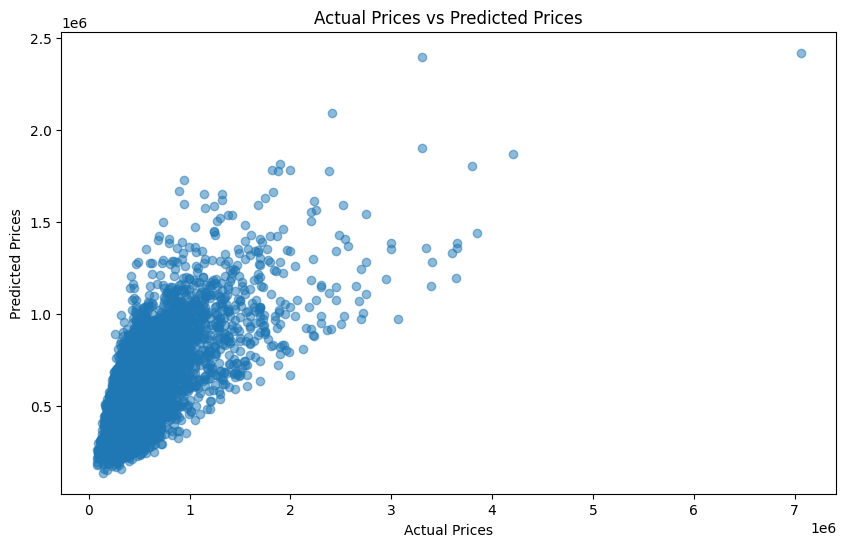

In [75]:
# Visualize predictions

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

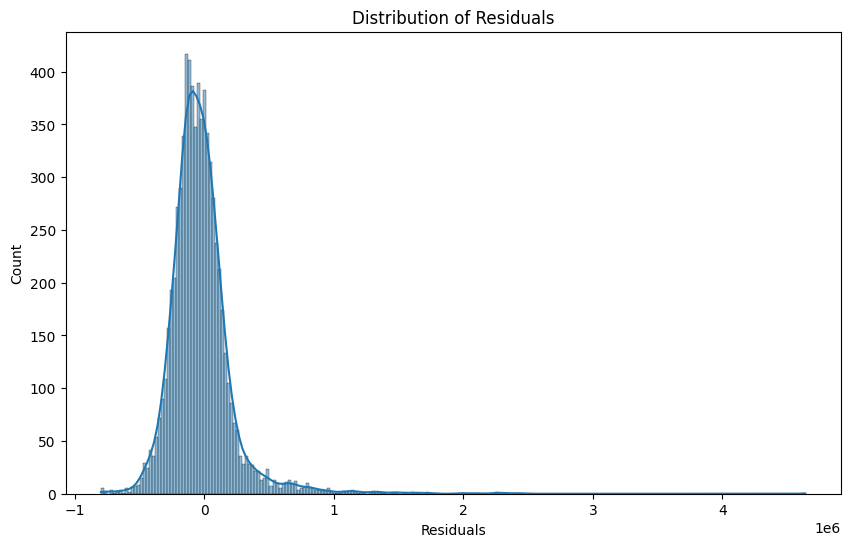

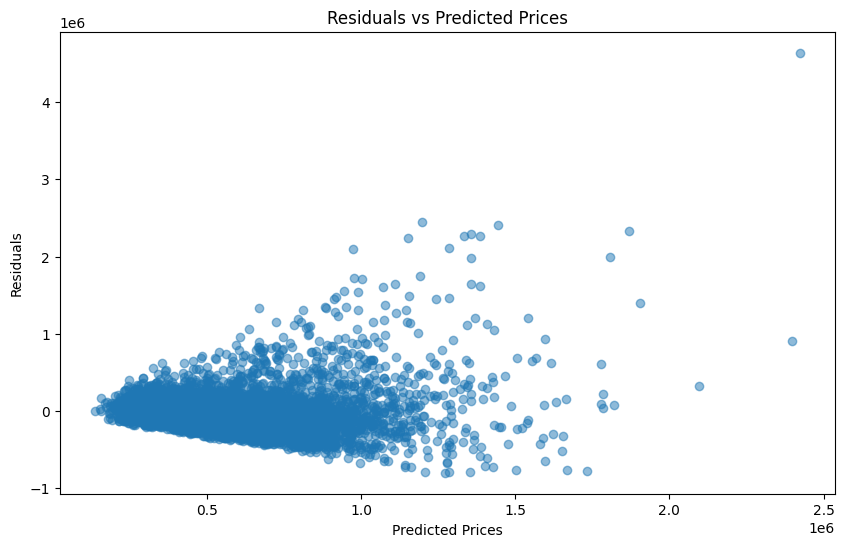

In [76]:
# Residuals analysis

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()

223/223 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
223/223 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
223/223 ━━━━━━━━

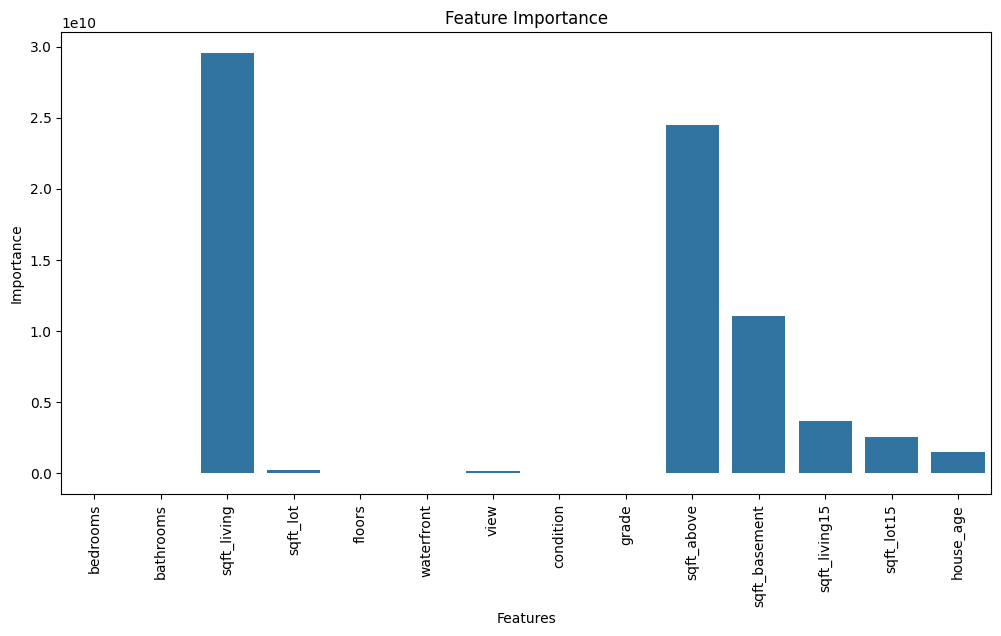

In [77]:
# Feature importance (using permutation importance)

results = permutation_importance(model, X_test, y_test, scoring='neg_mean_squared_error')
importance = results.importances_mean

plt.figure(figsize=(12, 6))
sns.barplot(x=X.columns, y=importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

Make Predictions

In [78]:
# Example prediction with new data

Xnew = np.array([[2, 3, 1280, 5550, 1, 0, 0, 4, 7, 2280, 0, 1440, 5750, 60]], dtype=np.float64)
ynew = model.predict(Xnew)
print(f'Xnew={Xnew}')
print(f'Prediction = {ynew}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Xnew=[[2.00e+00 3.00e+00 1.28e+03 5.55e+03 1.00e+00 0.00e+00 0.00e+00 4.00e+00
  7.00e+00 2.28e+03 0.00e+00 1.44e+03 5.75e+03 6.00e+01]]
Prediction = [[467739.88]]
